### Importing required libraries::::::


In [515]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, homogeneity_score, classification_report
import warnings
warnings.filterwarnings('ignore')

### Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/shrutimechlearn/step-by-step-kmeans-explained-in-detail/data) and answer the following questions :

In [516]:
mallCusdata = pd.read_csv("./Data/Mall_Customers.csv")
mallCusdata.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [517]:
mallCusdata.drop(["CustomerID"],inplace=True, axis=1)

In [518]:
mallCusdata.shape

(200, 4)

In [519]:
mallCusdata.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [520]:
labelEncoder = LabelEncoder()
mallCusdata['Genre'] = labelEncoder.fit_transform(mallCusdata['Genre'])

1.1 Perform k-means clustering over this dataset using Manhattan distance as the distance-measure.


In [521]:
# Normalizing data using standard scaling
scaler = StandardScaler()
mallCusdataScaled = scaler.fit_transform(mallCusdata)

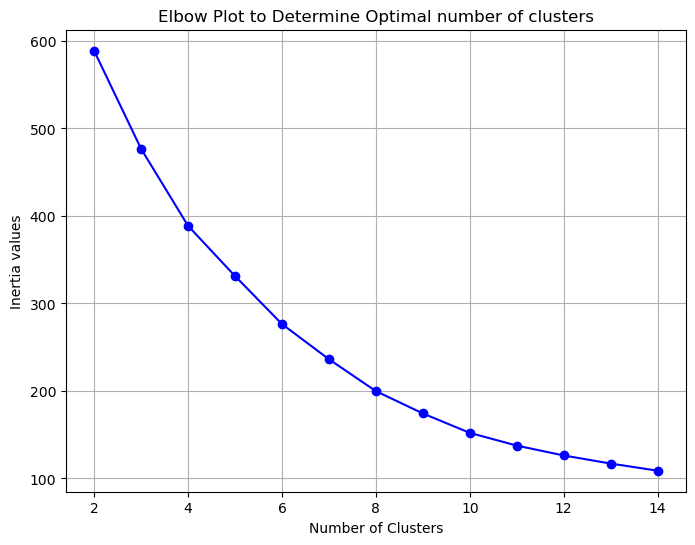

In [522]:
numberOfClusters = range(2, 15)
kmeansInertiaValues = []

for k in numberOfClusters:
    kmeans =  KMeans(n_clusters = k, random_state=42, n_init=10).fit(mallCusdataScaled)
    kmeansInertiaValues.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(numberOfClusters, kmeansInertiaValues, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia values')
plt.title('Elbow Plot to Determine Optimal number of clusters')
plt.grid(True)
plt.show()


In [523]:
# from the elbow plot above:::::
optimalNumberOfClusters = 4

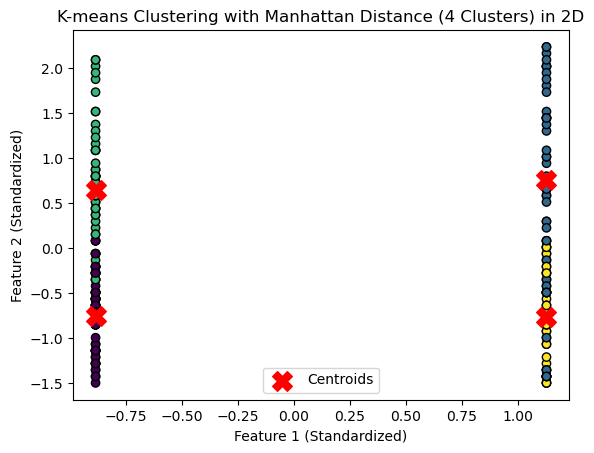

In [524]:
kmeans = KMeans(n_clusters= optimalNumberOfClusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(mallCusdataScaled)
labels_manhattan = pairwise_distances_argmin_min(mallCusdataScaled, kmeans.cluster_centers_, metric='manhattan')[0]

# Visualize the results
plt.scatter(mallCusdataScaled[:, 0], mallCusdataScaled[:, 1], c=labels_manhattan, cmap='viridis', marker='o', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering with Manhattan Distance (4 Clusters) in 2D')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

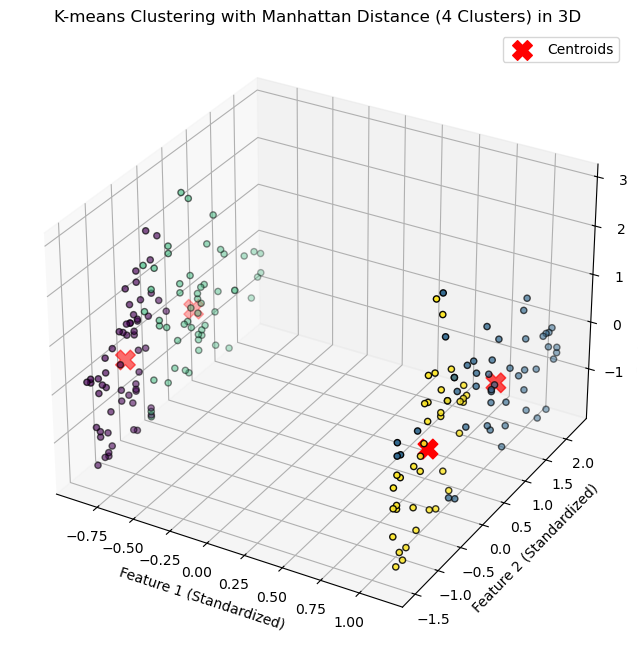

In [525]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of data points with color-coded clusters
scatter = ax.scatter(mallCusdataScaled[:, 0], mallCusdataScaled[:, 1], mallCusdataScaled[:, 2], c=labels_manhattan, cmap='viridis', marker='o', edgecolors='black')

# Scatter plot of centroids in red
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')

ax.set_title('K-means Clustering with Manhattan Distance (4 Clusters) in 3D')
ax.set_xlabel('Feature 1 (Standardized)')
ax.set_ylabel('Feature 2 (Standardized)')
ax.set_zlabel('Feature 3 (Standardized)')
ax.legend()

plt.show()

1.2 After performing k-means clustering, extract the groups or clusters and add a separate column in your dataset as
‘Labels’ and fill it with cluster number assigned by k-means algorithm.


In [526]:
mallCusdata['Labels'] = kmeans.labels_
mallCusdata.head()

,Genre,Age,Annual_Income_(k$),Spending_Score,Labels
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,2
3,0,23,16,77,0
4,0,31,17,40,2


1.3 Now, you should be ready with your labeled dataset. Perform standard classification task using logistic regression,
decision trees, random forest, and Naive Bayes algorithm.


In [527]:
features = mallCusdata.drop('Labels', axis=1)
target = mallCusdata['Labels']

In [528]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [529]:
def printMetrics(name, yPred):
    print(f"for {name}")
    print(f"Homogeneity::::::: {homogeneity_score(y_test, yPred)}")

def printReport(name, yPred):
    print(f"\n{name} Report:\n", classification_report(y_test, yPred))
    


In [530]:
logisticRegression = LogisticRegression(solver="saga", max_iter=4000, random_state=42)
decisionTreeClassifier = DecisionTreeClassifier(random_state=42)
randomForestClassifier = RandomForestClassifier(random_state=42)
gaussianNB = GaussianNB()

models = [logisticRegression, decisionTreeClassifier, randomForestClassifier, gaussianNB]

predictions = []

for model in models:
    model.fit(X_train, y_train)
    yPred = model.predict(X_test)
    printMetrics(type(model).__name__, yPred)
    printReport(type(model).__name__, yPred)

for LogisticRegression
Homogeneity::::::: 1.0

LogisticRegression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         9

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

for DecisionTreeClassifier
Homogeneity::::::: 0.8678624815317195

DecisionTreeClassifier Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.93      0.93      0.93        15
           2       0.95      1.00      0.97        18
           3       0.89      0.89      0.89         9

    accuracy                           0.95        60
   macro avg       0.94      0.94      0.94        60
weighted avg

1.4 Compare the performance of these various supervised learning algorithm and comment on the homogeneity of
clusters, like is the clusters or groups are making sense or not ? (10 Points)

As we can see from above report the Accuracy shown by different models; 1 by logistic regression when we increase the max_iter, 0.95 by decision tree and  0.98 by random forest and naive bayes.

On comparing the accuracy we can see::::
Logistic regression > random forest, naive bayes > decision tree

And we can see from above report the Homogeneity shown by different models; 1 by logistic regression when we increase the max_iter, 0.95 by decision tree and  0.98 by random forest and naive bayes.

Similarly, for Homogeneinty we can see the seperation and distinction of the classes are quite highly classified::
Logistic regression > random forest, naive bayes > decision tree

Also the precision, recall and f1score for each classes are higher; 100% for logistic regression and nearly 90% for other models.

### Consider the breast_cancer dataset given in the sklearn library and answer the following questions.


In [531]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

2.1 Import the breast_cancer dataset from sklearn.datasets library.


In [532]:
breastCancerDataset = load_breast_cancer()
breastCancerDataframe = pd.DataFrame(data = breastCancerDataset.data, columns = breastCancerDataset.feature_names) 
breastCancerDataframe['target'] = breastCancerDataset.target
breastCancerDataframe.head().T


,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


2.2 Perform PCA (2 components) and LDA (1 components) over the dataset.


In [533]:
# Normalizing data using standard scaling
scaler = StandardScaler()
breastCancerDataframeScaled = scaler.fit_transform(breastCancerDataframe)

In [534]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(breastCancerDataframeScaled)
principalDataFrame = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDataFrame.head()

,pc1,pc2
0,9.225770,2.116196
1,2.655802,-3.784776
2,5.892492,-1.005579
3,7.135401,10.318716
4,4.129423,-1.905579


In [535]:
# Perform LDA
#create LDA plot
print(breastCancerDataset.target_names)
X = breastCancerDataset.data
y = breastCancerDataset.target
lda = LinearDiscriminantAnalysis(n_components=1)
ldaData = lda.fit(X, y).transform(X)

['malignant' 'benign']


2.3 Visualise the components and see if its able to segregate the class label in breast_cancer dataset.

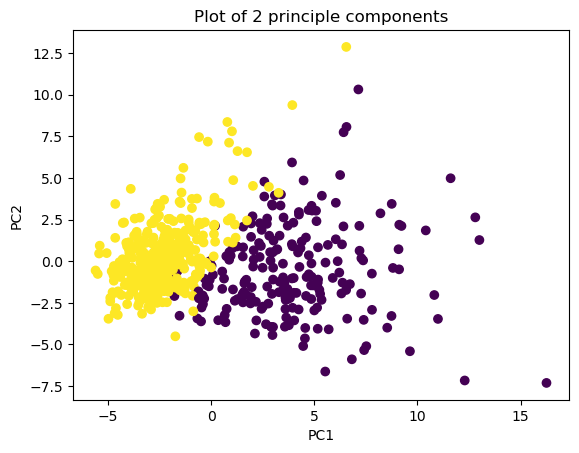

In [536]:
# Visualization of PCA::::
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot of 2 principle components')
plt.show()

- The 2 componets of PCA are able to classify the labels properly, we can see some overlaps but we can say its almost classified totally.

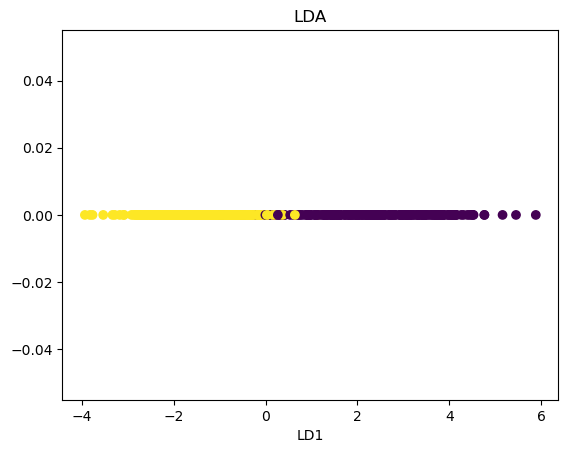

In [537]:
# Visualize LDA
plt.scatter(ldaData[:, 0], [0] * len(ldaData), c=y)
plt.xlabel('LD1')
plt.title('LDA')
plt.show()

- The visualization also shows liner classification between the target names which is spereated well enough for modelling.

2.4 What is the maximum variance explained by both the components in PCA and LDA.


In [538]:
# Maximum variance explained by PCA
print(f"Maximum variance by PCA: {pca.explained_variance_ratio_.max()}")
# Maximum variance explained by LDA
print(f"Maximum variance by LDA: {lda.explained_variance_ratio_.max()}")

Maximum variance by PCA: 0.4489603531322391
Maximum variance by LDA: 1.0


2.5 Comment on the working of PCA and LDA and which one is better for breast_cancer dataset.

- LDA is a supervised learning technique used to classify the label categories and PCA is unsupervised that can be used to reduce the number of features for analysis. In the case of breast cancer dataset, we have two target classes and alot of features. so, It would be better to reduce the number of features. The maximum variance provided by LDA and PCA is also not comparable because both variance are explained for different scenario. The maximum variance explained by PCA is only 45% that means we are losing more than half of the information in the data and the maximum variance explained by PCA is 1, which means the perfect classification between the classes. so, both are useful techniques for analysis, we can use both one followed by another techniques for the dataset.

But there are some drawbacks of LDA that need to be keep in mind:
LDA assumes that the data is normally distributed, which may not always be the case in real-world data sets. It assumes that the variables are statistically independent, is sensitive to outliers which can affect the accuracy of the model, is suitable for data sets with a large number of features as it can become computationally expensive.
